<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_data(y_hat)_add_delta_(3_2)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_3.2'

In [4]:
os.listdir(base_path)

['data_add_delta_3.2_n20.csv',
 'data_add_delta_3.2_n30.csv',
 'data_add_delta_3.2_n60.csv',
 'data_add_delta_3.2_n120.csv',
 'data_add_delta_3.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_3.2_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,73.682968,76.585736,-44.222913,116.045791,113.172545,2.873245
1,0.0,1.0,88.374754,58.380567,-440.259041,-283.503719,21.979008,-305.482727
2,0.0,2.0,34.532463,78.231259,-674.274461,-551.510739,261.823667,-813.334406
3,0.0,3.0,91.099177,73.721015,-149.235540,25.584651,42.750813,-17.166162
4,0.0,4.0,62.214802,30.855603,5.834566,108.904971,63.675067,45.229903
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,59.715637,59.313618,-674.119772,-545.090517,148.449901,-693.540418
249996,999.0,246.0,38.546518,21.863059,-5.575876,64.833701,14.717347,50.116353
249997,999.0,247.0,43.582197,28.511279,-397.235625,-315.142149,38.484721,-353.626870
249998,999.0,248.0,82.345447,98.497396,-832.227552,-641.384709,288.381853,-929.766562


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,73.682968,76.585736,-44.222913,116.045791,113.172545,2.873245
1,0.0,1.0,88.374754,58.380567,-440.259041,-283.503719,21.979008,-305.482727
2,0.0,2.0,34.532463,78.231259,-674.274461,-551.510739,261.823667,-813.334406
3,0.0,3.0,91.099177,73.721015,-149.235540,25.584651,42.750813,-17.166162
4,0.0,4.0,62.214802,30.855603,5.834566,108.904971,63.675067,45.229903
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,59.715637,59.313618,-674.119772,-545.090517,148.449901,-693.540418
249996,999.0,246.0,38.546518,21.863059,-5.575876,64.833701,14.717347,50.116353
249997,999.0,247.0,43.582197,28.511279,-397.235625,-315.142149,38.484721,-353.626870
249998,999.0,248.0,82.345447,98.497396,-832.227552,-641.384709,288.381853,-929.766562


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    73.682968  76.585736  -44.222913  116.045791  113.172545   
      1.0    88.374754  58.380567 -440.259041 -283.503719   21.979008   
      2.0    34.532463  78.231259 -674.274461 -551.510739  261.823667   
      3.0    91.099177  73.721015 -149.235540   25.584651   42.750813   
      4.0    62.214802  30.855603    5.834566  108.904971   63.675067   
...                ...        ...         ...         ...         ...   
999.0 245.0  59.715637  59.313618 -674.119772 -545.090517  148.449901   
      246.0  38.546518  21.863059   -5.575876   64.833701   14.717347   
      247.0  43.582197  28.511279 -397.235625 -315.142149   38.484721   
      248.0  82.345447  98.497396 -832.227552 -641.384709  288.381853   
      249.0  27.274295  25.577740   69.304885  132.156920   27.697678   

                  e_hat  
rep   index              
0.0   0.0      2.873245  
      1.0   -305.482727  
      2.0   -813.334406  
      3.0    -17.166162  
      4.0     45.229903  
...                 ...  
999.0 245.0 -693.540418  
      246.0   50.116353  
      247.0 -353.626870  
      248.0 -929.766562  
      249.0  104.459242  

[250000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    73.682968  76.585736  -44.222913  116.045791  113.172545   
      1.0    88.374754  58.380567 -440.259041 -283.503719   21.979008   
      2.0    34.532463  78.231259 -674.274461 -551.510739  261.823667   
      3.0    91.099177  73.721015 -149.235540   25.584651   42.750813   
      4.0    62.214802  30.855603    5.834566  108.904971   63.675067   
...                ...        ...         ...         ...         ...   
999.0 245.0  59.715637  59.313618 -674.119772 -545.090517  148.449901   
      246.0  38.546518  21.863059   -5.575876   64.833701   14.717347   
      247.0  43.582197  28.511279 -397.235625 -315.142149   38.484721   
      248.0  82.345447  98.497396 -832.227552 -641.384709  288.381853   
      249.0  27.274295  25.577740   69.304885  132.156920   27.697678   

                  e_hat  
rep   index              
0.0   0.0      2.873245  
      1.0   -305.482727  
      2.0   -813.334406  
      3.0    -17.166162  
      4.0     45.229903  
...                 ...  
999.0 245.0 -693.540418  
      246.0   50.116353  
      247.0 -353.626870  
      248.0 -929.766562  
      249.0  104.459242  

[250000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,73.682968,76.585736,-44.222913,116.045791,113.172545,2.873245
1,0.0,1.0,88.374754,58.380567,-440.259041,-283.503719,21.979008,-305.482727
2,0.0,2.0,34.532463,78.231259,-674.274461,-551.510739,261.823667,-813.334406
3,0.0,3.0,91.099177,73.721015,-149.235540,25.584651,42.750813,-17.166162
4,0.0,4.0,62.214802,30.855603,5.834566,108.904971,63.675067,45.229903
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,59.715637,59.313618,-674.119772,-545.090517,148.449901,-693.540418
249996,999.0,246.0,38.546518,21.863059,-5.575876,64.833701,14.717347,50.116353
249997,999.0,247.0,43.582197,28.511279,-397.235625,-315.142149,38.484721,-353.626870
249998,999.0,248.0,82.345447,98.497396,-832.227552,-641.384709,288.381853,-929.766562


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    73.682968  76.585736  -44.222913  116.045791  113.172545   
      1.0    88.374754  58.380567 -440.259041 -283.503719   21.979008   
      2.0    34.532463  78.231259 -674.274461 -551.510739  261.823667   
      3.0    91.099177  73.721015 -149.235540   25.584651   42.750813   
      4.0    62.214802  30.855603    5.834566  108.904971   63.675067   
...                ...        ...         ...         ...         ...   
999.0 245.0  59.715637  59.313618 -674.119772 -545.090517  148.449901   
      246.0  38.546518  21.863059   -5.575876   64.833701   14.717347   
      247.0  43.582197  28.511279 -397.235625 -315.142149   38.484721   
      248.0  82.345447  98.497396 -832.227552 -641.384709  288.381853   
      249.0  27.274295  25.577740   69.304885  132.156920   27.697678   

                  e_hat  
rep   index              
0.0   0.0      2.873245  
      1.0   -305.482727  
      2.0   -813.334406  
      3.0    -17.166162  
      4.0     45.229903  
...                 ...  
999.0 245.0 -693.540418  
      246.0   50.116353  
      247.0 -353.626870  
      248.0 -929.766562  
      249.0  104.459242  

[250000 rows x 6 columns]

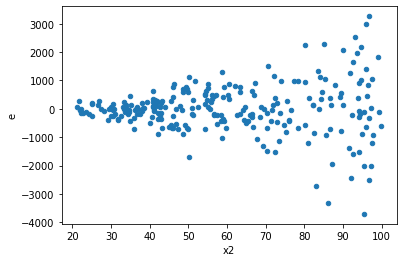

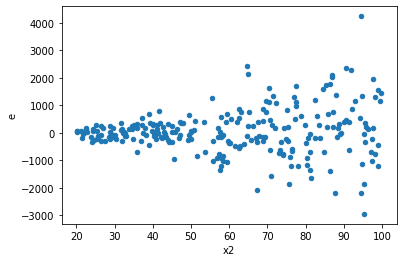

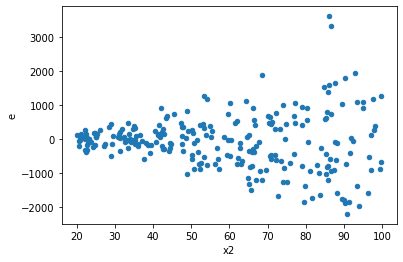

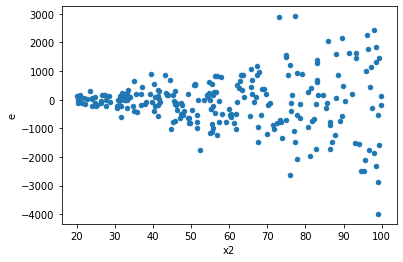

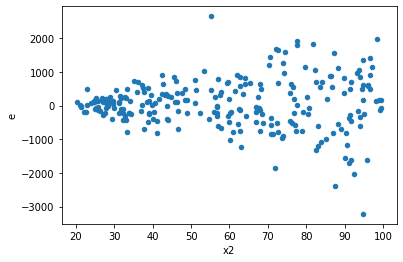

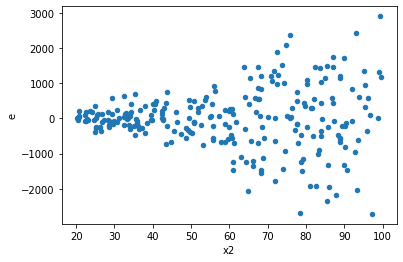

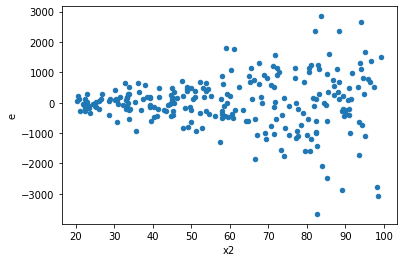

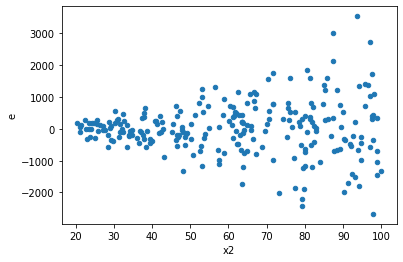

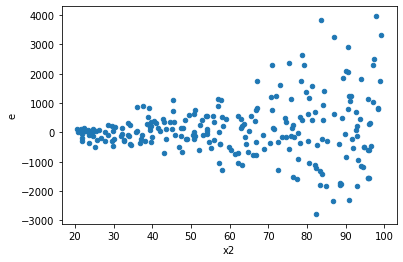

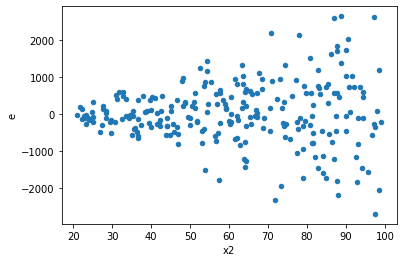

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,98.0,98.0,34951533.44788612,88288946.47987366,356648.30048863386,900907.617141568,2.526039282697435,6.888690264883479e-06,0.9999965556548676,3.4443451324417396e-06,Reject005=0 : Heteroscedasticity
1.0,98.0,98.0,12180207.007123444,130920843.31331675,124287.82660330045,1335926.9725848648,10.74865502998014,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
4.0,98.0,98.0,47389586.70537839,50897820.92335333,483567.21127937135,519365.5196260544,1.0740296436807029,0.7244175118250953,0.6377912440874524,0.36220875591254764,Reject005=1 : Homoscedasticity
5.0,98.0,98.0,24999852.35738767,118907573.86078478,255100.53425905784,1213342.5904161714,4.756331043917009,1.8962609260597674e-13,0.9999999999999052,9.481304630298837e-14,Reject005=0 : Heteroscedasticity
6.0,98.0,98.0,10420338.30156258,147052236.21710625,106329.98266900591,1500533.0226235332,14.112040507845611,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
7.0,98.0,98.0,22125685.380423333,129626860.13562177,225772.2998002381,1322723.0626083855,5.858659648587193,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
8.0,98.0,98.0,13715003.342813244,193903367.88493872,139949.01370217596,1978605.7947442727,14.138047438868867,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
9.0,98.0,98.0,48110500.55278618,83285814.33306274,490923.4750284304,849855.2482965585,1.7311358929155742,0.007087242285819473,0.9964563788570903,0.0035436211429097364,Reject005=0 : Heteroscedasticity
10.0,98.0,98.0,32423047.351617184,107396600.03302352,330847.4219552774,1095883.6738063626,3.3123536744817064,8.939898821225256e-09,0.9999999955300506,4.469949410612628e-09,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,98.0,98.0,34951533.44788612,88288946.47987366,356648.30048863386,900907.617141568,2.526039282697435,6.888690264883479e-06,Reject005=0 : Heteroscedasticity
1.0,98.0,98.0,12180207.007123444,130920843.31331675,124287.82660330045,1335926.9725848648,10.74865502998014,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
2.0,98.0,98.0,65258710.1067496,51270076.95988756,665905.2051709143,523164.05061109754,0.7856434317506497,0.23418026797625613,Reject005=1 : Homoscedasticity
3.0,98.0,98.0,92320641.67306583,77428828.30390844,942047.3640108758,790090.0847337595,0.8386946505214551,0.3854341448710013,Reject005=1 : Homoscedasticity
4.0,98.0,98.0,47389586.70537839,50897820.92335333,483567.21127937135,519365.5196260544,1.0740296436807029,0.7244175118250953,Reject005=1 : Homoscedasticity
5.0,98.0,98.0,24999852.35738767,118907573.86078478,255100.53425905784,1213342.5904161714,4.756331043917009,1.8962609260597674e-13,Reject005=0 : Heteroscedasticity
6.0,98.0,98.0,10420338.30156258,147052236.21710625,106329.98266900591,1500533.0226235332,14.112040507845611,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
7.0,98.0,98.0,22125685.380423333,129626860.13562177,225772.2998002381,1322723.0626083855,5.858659648587193,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
8.0,98.0,98.0,13715003.342813244,193903367.88493872,139949.01370217596,1978605.7947442727,14.138047438868867,2.220446049250313e-16,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    827
Reject005=1 : Homoscedasticity      173
Name: Result_test, dtype: int64